In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras import optimizers, regularizers
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


# Part I - Feature extraction using Deep Learning

In [2]:
data_dir = '../input/art-movements/dataset/dataset/'

## Loading data

In [3]:
RESOLUTION = 150
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        data_dir + 'train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

val_generator = val_datagen.flow_from_directory(
        data_dir + 'train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        data_dir + 'test/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 540 images belonging to 3 classes.
Found 228 images belonging to 3 classes.
Found 192 images belonging to 3 classes.


In [4]:
# Class labels
train_generator.class_indices

{'cubism': 0, 'expressionism': 1, 'romanticism': 2}

In [5]:
## Imagenet InceptionV3 weights
weights_v3_path = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

## Creating model (InceptionV3) using Transfer learning

In [6]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=weights_v3_path)

## Freezing first 32. layers (Edges and basic shapes)
for layer in conv_base.layers[:32]:
    layer.treinable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adjust here to 3 class
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 26,522,403
Trainable params: 26,487,971
Non-trainable params: 34,432
_________________________________________________________________


In [8]:
N_TRAIN = 540
N_VAL = 228
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=40,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/40
8/8 [==============================] - 51s 6s/step - loss: 1.0457 - acc: 0.5391 - val_loss: 0.7857 - val_acc: 0.6719
Epoch 2/40
8/8 [==============================] - 12s 1s/step - loss: 0.3111 - acc: 0.8940 - val_loss: 0.6498 - val_acc: 0.6951
Epoch 3/40
8/8 [==============================] - 17s 2s/step - loss: 0.1561 - acc: 0.9680 - val_loss: 0.5226 - val_acc: 0.8049
Epoch 4/40
8/8 [==============================] - 16s 2s/step - loss: 0.0577 - acc: 0.9837 - val_loss: 0.5793 - val_acc: 0.7500
Epoch 5/40
8/8 [==============================] - 17s 2s/step - loss: 0.0430 - acc: 0.9882 - val_loss: 0.5281 - val_acc: 0.8073
Epoch 6/40
8/8 [==============================] - 17s 2s/step - loss: 0.0154 - acc: 0.9980 - val_loss: 0.7056 - val_acc: 0.7927
Epoch 7/40
8/8 [==============================] - 17s 2s/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.4580 - val_acc: 0.8110
Epoch 8/40
8/8 [==============================] - 17s 2s/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0

## Report 

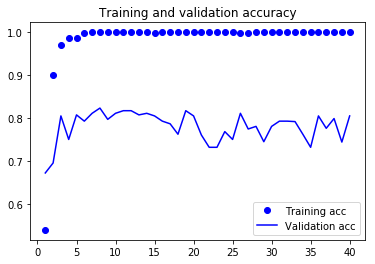

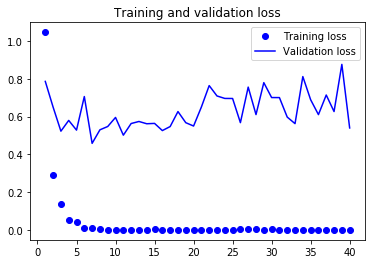

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

In [10]:
# saving first model
models = []
models.append(model)

## Creating a new model (InceptionV3) without Transfer Learning

In [11]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights=None)

## Freezing first 32. layers (Edges and basic shapes)
for layer in conv_base.layers[:32]:
    layer.treinable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# adjust here to 3 class
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

In [12]:
N_TRAIN = 540
N_VAL = 228
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=40,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE)
)

Epoch 1/40
8/8 [==============================] - 54s 7s/step - loss: 1.1432 - acc: 0.4913 - val_loss: 1.6535 - val_acc: 0.4451
Epoch 2/40
8/8 [==============================] - 8s 1s/step - loss: 0.8918 - acc: 0.6359 - val_loss: 1.2699 - val_acc: 0.5938
Epoch 3/40
8/8 [==============================] - 17s 2s/step - loss: 0.8179 - acc: 0.6433 - val_loss: 0.9148 - val_acc: 0.5854
Epoch 4/40
8/8 [==============================] - 17s 2s/step - loss: 0.6833 - acc: 0.7019 - val_loss: 1.1376 - val_acc: 0.5244
Epoch 5/40
8/8 [==============================] - 17s 2s/step - loss: 0.5574 - acc: 0.7542 - val_loss: 0.7889 - val_acc: 0.6707
Epoch 6/40
8/8 [==============================] - 18s 2s/step - loss: 0.4546 - acc: 0.8200 - val_loss: 1.0485 - val_acc: 0.6510
Epoch 7/40
8/8 [==============================] - 19s 2s/step - loss: 0.4161 - acc: 0.8516 - val_loss: 1.1868 - val_acc: 0.5732
Epoch 8/40
8/8 [==============================] - 17s 2s/step - loss: 0.3766 - acc: 0.8406 - val_loss: 0.

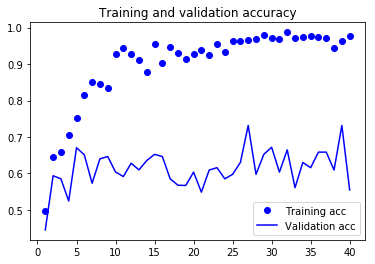

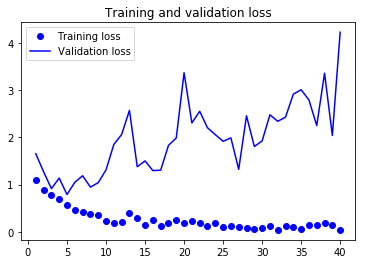

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

In [14]:
models.append(model)

## Evaluate models for the test set

In [15]:
loss, acc = models[0].evaluate_generator(test_generator, steps=len(test_generator))
print('transfer learning model - loss:{:.2f} - acc:{:.2f}'.format(loss, acc))
loss, acc = models[1].evaluate_generator(test_generator, steps=len(test_generator))
print('without transfer learning model - loss:{:.2f} - acc:{:.2f}'.format(loss, acc))


transfer learning model - loss:0.78 - acc:0.76
without transfer learning model - loss:4.07 - acc:0.53


## The first model was better


In [16]:
# let's use the first model, the accuracy is better.
model = models[0]
model.save('inception_v3_art.h5')

## Remove the classification layer (:-1)

In [17]:
# using first model, the accuracy is better.
model = models[0]
model.pop()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
Total params: 26,521,632
Trainable params: 26,487,200
Non-trainable params: 34,432
_________________________________________________________________


## Save features as numpy arrays

In [18]:
Y_pred = model.predict_generator(test_generator, steps=len(test_generator))
np.save('features_inception_v3.npy', Y_pred)